## Tokenized news를 TFIDF로 벡터화

In [1]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
tmp_df = pd.read_csv('../data/tokenized_news/tokenized_all')

In [3]:
tmp_df = tmp_df.drop(columns='Unnamed: 0')

In [41]:
tfidf_vect = TfidfVectorizer(max_df=0.90, min_df=0.40)

#feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(tmp_df['text_V'].apply(lambda x: np.str_(x)))

In [42]:
# from sklearn.cluster import KMeans

# # 5개 집합으로 군집화 수행. 
# # 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
# km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
# km_cluster.fit(feature_vect)
# cluster_label = km_cluster.labels_
# cluster_centers = km_cluster.cluster_centers_

In [43]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 (기사)
km_cluster = KMeans(n_clusters=4, init='k-means++', max_iter=10000)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
tmp_df['cluster_label'] = cluster_label
tmp_df.sort_values(by='cluster_label')

,title,text,url,media,date,text_V,title_V,cluster_label,silhouette_coeff
19335,"김종인 “대학서 학사·석사·박사로 10년 과정, 이 시대에 쓸모 있나”",국회 내 고등교육심의위원회 설치와 데이터청(廳) 설립. 김종인 미래통합당 비상대책위...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-06-12,"국회, 고등교육, 심의, 위원회, 설치, 데이터, 설립, 김종인, 미래, 통합, 비...","김종인, 대학, 학사, 석사, 박사, 과정, 시대, 쓸모",0,0.974612
12882,24일 고3 첫 모의고사 ‘재택 시험’… 성적 처리 안 해 사실상 취소,[서울신문]\n코로나19의 여파로 올해 첫 대학수학능력평가 모의평가인 서울교육청 주...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-04-21,"서울, 신문, 코로나, 여파, 올해, 대학, 수학, 능력, 평가, 모의, 평가, 서...","모의고사, 재택, 시험, 성적, 처리, 사실, 취소",0,0.782939
12883,“우리 삶은 바뀐 게 없다… 장애인 차별과 배제 멈춰 달라”,"[서울신문]\n“대통령이 바뀌고 정권이 바뀌었지만, 우리의 삶은 바뀐 게 없다.”\...",https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-04-21,"서울, 신문, 대통령, 정권, 장애인, 차별, 철폐, 장애인, 시민사회단체, 장애인...","장애인, 차별, 배제, 달라",0,0.782939
12884,민주당 “지급액 줄여서라도 모든 국민에 줘야”… 정부·野 압박,[서울신문]\n丁총리 “즉각 집행 중요… 일부 계층 제외” \n이해찬 “여야 전 국...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-04-21,"서울, 신문, 총리, 즉각, 집행, 중요, 일부, 계층, 제외, 이해찬, 여야, 국...","민주당, 지급, 액, 여서, 모든, 국민, 정부, 압박",0,0.974612
5430,대구 환자 다녀간 병원·호텔·교회 폐쇄… TK 슈퍼전파자 우려,[서울신문]\n해외여행·환자접촉 없는 세 번째 사례 \n대중교통 이용·서울 회사 본...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-02-19,"서울, 신문, 해외여행, 환자, 접촉, 사례, 대중교통, 이용, 서울, 회사, 본사...","대구, 환자, 병원, 호텔, 교회, 폐쇄, 슈퍼, 전파, 우려",0,0.974612
...,...,...,...,...,...,...,...,...,...
22815,최강욱에 사전 유출된 법무부 '秋 입장문',장관 보좌진 통해 여권에 흘러가\n\n\n\t\t\t\t'채널A 기자의 강요미수 의...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-07-10,"장관, 보좌, 여권, 채널, 기자, 강요, 미수, 의혹, 사건, 수사, 지휘, 발동...","최강욱, 사전, 유출, 법무부, 입장",3,0.344603
8351,공매도 6개월 금지… 문 대통령 “전례 없는 대책 세워라”,신종 코로나바이러스감염증(코로나19) 사태로 패닉에 빠진 주식시장을 진정시키기 위해...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-03-14,"신종, 코로나바이러스, 감염증, 코로나, 사태, 패닉, 주식시장, 진정, 정부, 공...","공매도, 개월, 금지, 대통령, 전례, 대책",3,0.207572
8348,비례용 정당들 각축전…전례없는 기형적 선거구도,ㆍ소수정당도 지역구보다 비례 초점…거대 양당 대결구도 강화\n\n\n\n더불어민주당...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-03-14,"수정, 지역구, 비례, 초점, 거대, 대결, 구도, 강화, 민주당, 범여, 비례대표...","비례, 정당, 축전, 전례, 기형, 선거구",3,0.974612
18565,"""원전감사 늦어 죄송… 법·원칙대로 조사""","감사원장 전례없는 공개 사과 ""법정기간에 못끝내 책임 통감… 빠른 시일내에 결론 내...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-06-06,"감사원장, 전례, 공개, 사과, 법정, 기간, 책임, 통감, 결론, 최재형, 사진,...","원전, 감사, 죄송, 법, 원칙, 조사",3,0.974612


In [44]:
tmp_df['cluster_label'] = cluster_label

In [45]:
tmp_df[tmp_df['cluster_label']==0].sort_values(by='date')

,title,text,url,media,date,text_V,title_V,cluster_label,silhouette_coeff
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"일자리, 일거리, 학습, 데이터, 가공, 기업, 우드, 웍스, 교육장, 참관, 소화...","기계, 정확도, 인간, 부품, 육성, 공장, 노동",0,0.974612
79,[알립니다] 2020 한국일보 신춘문예 당선자 선정,2020년 한국일보 신춘문예 5개 부문 당선자 5명이 선정됐습니다. 한국 문학의 미...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01,"한국, 신춘문예, 부문, 당선자, 선정, 한국, 문학, 미래, 작가, 탄생, 축하,...","한국, 신춘문예, 당선자, 선정",0,1.000000
47,“우리 사회 갈 길은 파랑” 39% … 공정·법치 열망 드러나 [2020 신년특집 ...,‘밈’ 분석으로 본 현재와 미래 / “법치 제대로 작동 않는다” 평가 반영 / 유대...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-01-01,"분석, 미래, 법치, 제대로, 작동, 평가, 반영, 대감, 의미, 초록, 조국, 사...","사회, 파랑, 공정, 법치, 열망, 신년, 특집, 한국, 사회, 진단",0,1.000000
46,국민 79% “친일·종북 프레임 그만” [2020 신년특집 - 한국사회 진단],"적극 보수층도 절반 이상 피로감/ 75% “대기업, 한국 경제에 기여”\n\n ...",https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-01-01,"적극, 보수, 층, 절반, 피로, 대기업, 한국, 경제, 기여, 한파, 서울, 최저...","국민, 친일, 종북, 프레임, 신년, 특집, 한국, 사회, 진단",0,1.000000
44,공수처발 한파에 국회 올스톱 위기... 총리 인준·민생입법 어쩌나 [공수처법 통과 이후],식물·동물 이어 ‘표류국회’ 되나 / 한국당 對與투쟁 강화·보수 통합 박차 / 홍준...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-01-01,"식물, 동물, 표류, 국회, 한국, 투쟁, 강화, 보수, 통합, 박차, 홍준표, 통...","처발, 한파, 국회, 스톱, 위기, 총리, 인준, 민생, 입법, 처법, 통과",0,1.000000
...,...,...,...,...,...,...,...,...,...
28910,“어차피 야간장사 접을까 고민” 2.5단계 우울한 현장,심상치 않은 코로나19 재확산세에 수도권에는 1주일간 이른바 ‘사회적 거리두기 2....,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-31,"상치, 코로나, 확산, 수도권, 일간, 사회, 거리, 두기, 단계, 적용, 첫날, ...","어차피, 야간, 장사, 고민, 단계, 현장",0,0.974612
28898,"카공족, 스타벅스 대신 동네 카페로…‘맛집’에도 손님 줄어",[경향신문] \n\n\n\n\n\n30일 정오쯤 서울 광진구 한 스타벅스 매장 내부...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-08-31,"정오, 서울, 광진구, 스타벅스, 매장, 내부, 평소, 테이블, 의자, 한쪽, 구석...","스타벅스, 대신, 동네, 카페, 맛집, 손님",0,0.652041
29037,모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까,"30일 0시부터 서울 전역에 강화된 사회적 거리두기(2.5단계)가 시행됐지만, 전문...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,"서울, 전역, 강화, 사회, 거리, 두기, 단계, 시행, 전문가, 방역, 효과, 의...","조치, 환자, 비율, 육박, 거리, 두기, 단계, 효과",0,0.887637
28968,업무개시명령에도 응급실 진료 지연… 집합금지명령에도 대면 예배 진행,대한전공의협의회가 파업 지속을 결정한 30일 서울 종로구 서울대병원 응급실 출입구에...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-08-31,"의협, 의회, 파업, 지속, 결정, 서울, 종로구, 서울대, 병원, 응급실, 출입구...","업무, 명령, 응급실, 진료, 지연, 집합, 금지명령, 대면, 예배, 진행",0,0.782939


In [46]:
tmp_df[tmp_df['cluster_label']==1].sort_values(by='date')

,title,text,url,media,date,text_V,title_V,cluster_label,silhouette_coeff
2205,"‘중국 우한 폐렴’ 국내 첫 발생, 위기경보 ‘주의’로",ㆍ19일 입국 30대 중국 국적 여성\n\n‘중국 우한 폐렴’ 확진자가 국내에서 처...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-21,"입국, 중국, 국적, 여성, 중국, 우한, 폐렴, 진자, 국내, 처음, 보건, 당국...","중국, 우한, 폐렴, 국내, 위기, 경보, 주의",1,0.974612
2211,"‘우한 폐렴’, “사람 간 전염 가능한 듯…전염력 크기는 지켜봐야”","ㆍ확산 속도는…신종 질병이라 파악 단계\nㆍ메르스 사태와 비교 어려워\nㆍ질본, 빠...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-21,"확산, 속도, 신종, 질병, 파악, 단계, 메르스, 사태, 비교, 검사, 법, 개발...","우한, 폐렴, 사람, 전염, 염력, 크기",1,0.974612
2299,"우한 폐렴은 신종 코로나바이러스, 공기로 전파 여부는 확인 안돼",[오늘의 세상]\n메르스·사스와 다른 7번째 신종… 중국서 가족끼리 감염사례 나와\...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-01-21,"오늘, 세상, 메르스, 사스, 신종, 중국, 가족, 끼리, 감염, 사례, 분비물, ...","우한, 폐렴, 신종, 코로나바이러스, 공기, 전파, 확인",1,0.974612
2367,"우한 폐렴, 사람간 전파 확인… 中 대확산 1~2주가 고비",중국 당국이 신종 코로나바이러스감염증(우한 폐렴)의 사람 간 전파를 인정하고 의료진...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-22,"중국, 당국, 신종, 코로나바이러스, 감염증, 우한, 폐렴, 사람, 전파, 인정, ...","우한, 폐렴, 사람, 전파, 확인, 확산, 주가, 고비",1,0.974612
2447,"우한폐렴 사람간 전파 확인, 中의료진도 20명 감염","중국 감염자 309명·사망자 6명\n""북한, 中관광객 입국 잠정 금지""\n\n\n중...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-01-22,"중국, 감염, 사망자, 북한, 관광객, 입국, 잠정, 금지, 중국, 우한, 폐렴, ...","우한, 폐렴, 사람, 전파, 확인, 의료, 진도, 감염",1,0.652041
...,...,...,...,...,...,...,...,...,...
28939,2주 연속 200명이상 확진…‘깜깜이’ 잡아야 확산세 꺾는다,지난주도 주후반에 급속 확산 \n\n깜깜이 환자 21.5%로 최고치 \n\n전주 패...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-31,"지난주, 후반, 급속, 확산, 깜깜, 환자, 최고, 전주, 패턴, 답습, 땐, 단계...","연속, 확진, 깜깜, 확산",1,0.974612
28940,"대구, 또 ‘교회發’ 비상… 순천선 방판업체發 n차 감염",관련 확진자 총 38명에 달해 \n\n전남 확진 64.8%가 순천시민\n\n수도권에...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-31,"진자, 전남, 확진, 순천, 시민, 수도권, 전국, 확산, 유행, 신종, 코로나바이...","대구, 교회, 비상, 순천, 방판, 업체, 감염",1,0.782939
28941,"중증환자 수용 병상, 더이상 여유 없다",수도권 여유 병상 10개 불과 \n\n앞으로 5일내 병상 동날듯\n\n신종 코로나바...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-31,"수도권, 여유, 병상, 불과, 앞, 병상, 날듯, 신종, 코로나바이러스, 감염증, ...","중증, 환자, 수용, 병상, 여유",1,0.974612
28921,“흩어져야 산다” 절체절명 일주일,“오늘부터 일주일은 ‘일상을 포기한다’는 절체절명의 각오를 가져주시길 부탁드립니다....,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,2020-08-31,"오늘, 일주일, 일상, 포기, 절체절명, 각오, 서정협, 서울시장, 권한, 대행, ...","산다, 절체절명, 일주일",1,0.974612


In [47]:
tmp_df[tmp_df['cluster_label']==2].sort_values(by='date')

,title,text,url,media,date,text_V,title_V,cluster_label,silhouette_coeff
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"비정규직, 표현, 정부, 신규, 일자리, 비정규직, 정규직, 전환, 주력, 사이, ...","일과, 경계, 노동",2,0.974612
84,"원유 매장량 세계 1위 베네수엘라, 주유소마다 대기 차량 장사진","[적대사회, 신음하는 지구촌] “정부 밀매 위해 공급 조절” 관측도\n\n\n\n“...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01,"적대, 사회, 신음, 지구촌, 정부, 공급, 조절, 관측, 어제, 기름, 두, 원유...","원유, 장량, 세계, 베네수엘라, 주유소, 대기, 차량, 장사진",2,0.887637
83,차베스 ‘국유화 광풍’… 측근들 기업 수탈에 산업도시가 유령도시로,"[적대사회, 신음하는 지구촌] <1> 국민이 등돌린 베네수엘라\n\n1300여곳 국...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01,"적대, 사회, 신음, 지구촌, 국민, 베네수엘라, 국유화, 제조업, 메카, 마라카이...","차베스, 국유화, 광풍, 측근, 기업, 수탈, 산업, 도시, 유령도시",2,1.000000
77,총선 4개월 앞… 야당심판론이 정권심판론 앞섰다,"본보, 한국리서치와 여론조사\n\n\n\n 4월 15일 실시되는 21대 총선을 10...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01,"한국, 리서치, 여론조사, 실시, 총선, 민심, 정권, 심판, 야당, 심판, 기운,...","총선, 개월, 앞, 야당, 심판, 정권, 심판",2,1.000000
76,"[한국일보 1면 사진] 적대사회, 이미 닥친 디스토피아 (1월 1일자)",지난달 12일 베네수엘라 수도 카라카스 중심지 볼리바르 광장 인근 관공서에 연말을 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-01-01,"지난달, 베네수엘라, 수도, 카라카스, 중심지, 볼리바르, 광장, 인근, 관공서, ...","한국, 사진, 적대, 사회, 디스토피아, 일자",2,1.000000
...,...,...,...,...,...,...,...,...,...
28955,"파업, 이쯤에서 끝냅시다","대전협, 재투표 끝에 파업 지속 강행\n“비대위 과반 파업 중단 원해” 주장도\n정...",https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-08-31,"대전, 투표, 파업, 지속, 강행, 대위, 과반, 파업, 중단, 정부, 환자, 고통...","파업, 이쯤",2,0.974612
28958,“이번 주 확산세 진정 안 되면 3단계로” 방역당국 ‘마지막 카드’ 남기고 배수진,30일부터 수도권에서 사회적 거리두기 2.5단계가 시행되면서 정부가 3단계 격상 여...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-08-31,"수도권, 사회, 거리, 두기, 단계, 시행, 정부, 단계, 격상, 결정, 앞서, 모...","확산, 진정, 단계, 방역, 당국, 마지막, 카드, 배수진",2,0.652041
28962,“2차 재난지원금 빨리 풀어야” 커지는 목소리,수도권 내 거리두기 2.5단계 시행으로 소상공인과 자영업자에 심각한 피해가 우려되면...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-08-31,"수도권, 거리, 두기, 단계, 시행, 상공, 자영, 업자, 피해, 우려, 정부, 긴...","재난, 원금, 목소리",2,0.782939
28964,복지부 “집단휴진은 환자 희생 요구하는 불의한 행동”,정부는 대한전공의협의회(대전협)가 30일 집단휴진(파업)을 계속하기로 결정하자 당황...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,2020-08-31,"정부, 의협, 의회, 대전, 집단, 파업, 계속, 결정, 당황, 기색, 파업, 유지...","복지부, 집단, 환자, 희생, 요구, 불의, 행동",2,0.974612


In [48]:
# tmp_df[tmp_df['cluster_label']==3].sort_values(by='date')

In [49]:
# tmp_df[tmp_df['cluster_label']==4].sort_values(by='date')

In [50]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['text_V']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [51]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
#         print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [52]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=tmp_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=5)
# top_features : 중심과 가까운 값
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['서울', '금지', '배포', '지난', '무단']
####### Cluster 1
Top features: ['코로나', '정부', '상황', '지난', '금지']
####### Cluster 2
Top features: ['정부', '대한', '상황', '금지', '배포']


- Cluster 0 : 정치
- Cluster 1 : 사회
- Cluster 2 : 경제

In [53]:
score_samples = silhouette_samples(feature_vect, tmp_df['cluster_label'])
print('silhouette_samples return 값의 shape' , score_samples.shape)

silhouette_samples return 값의 shape (29041,)


In [54]:
tmp_df['silhouette_coeff'] = score_samples

In [55]:
# 모든 데이터의 평균 실루엣 계수를 구함
average_score = silhouette_score(feature_vect, tmp_df['cluster_label'])

In [56]:
print('뉴스 타이틀 Silhouette Analysis Score:{0:.3f}'.format(average_score))
tmp_df['silhouette_coeff']

뉴스 타이틀 Silhouette Analysis Score:0.274


0        0.480224
1        0.078945
2        0.085762
3        0.508880
4        0.290592
           ...   
29036    0.117247
29037    0.179911
29038    0.470298
29039    0.516589
29040    0.402672
Name: silhouette_coeff, Length: 29041, dtype: float64

### Number of cluster

Inertia가 낮고, 그룹이 적을수록 좋은 모델

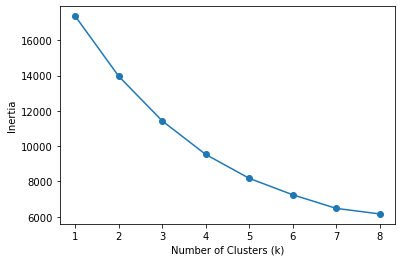

In [57]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = [] # centroid와 각 데이터들 사이의 거리를 나타냄
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(feature_vect)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [58]:
tmp_df['title'][tmp_df['cluster_label']==0]

2          이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동]
9           [20대 리포트] “없는 길 만드는 스타트업… 패기는 기본, 땀은 필수죠”
10          [20대 리포트] 모두가 가는 대학 대신, 나만의 길 찾아 “세상 속으로”
15                  미래 100년 향해 펼쳐진 순백의 평원… 이야기를 채워주세요
19                     다짜고짜 반말에 얼평-몸평까지… 꼰대에 절망하는 청년들
                             ...                     
29014              38년전 기자 이낙연, 김종인 덕 특종...눈길끄는 둘의 인연
29016               문 닫은 자영업자 "내보낸 직원과 알바자리 경쟁하게 생겼다"
29020                     카페서도 식당서도…차분히 ‘멈춤’에 적응한 시민들
29037    모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까
29038            내일부터 서울 시내버스 밤 9시 이후 20% 감축… 주말 수준으로
Name: title, Length: 5877, dtype: object

In [59]:
tmp_df['title'][tmp_df['cluster_label']==1]

2205            ‘중국 우한 폐렴’ 국내 첫 발생, 위기경보 ‘주의’로
2211     ‘우한 폐렴’, “사람 간 전염 가능한 듯…전염력 크기는 지켜봐야”
2299       우한 폐렴은 신종 코로나바이러스, 공기로 전파 여부는 확인 안돼
2367          우한 폐렴, 사람간 전파 확인… 中 대확산 1~2주가 고비
2447              우한폐렴 사람간 전파 확인, 中의료진도 20명 감염
                         ...                  
29031       서울대 수능 최저학력기준 완화...101개 대학 입시계획 변경
29032        위ㆍ중증 환자 10일만에 6배 급증...병상확보에 '초비상'
29033     아베 후임은 '한국 때리기' 유혹 피할까... 한일관계 3대 변수
29034          스가 대망론 확산... 총재 선출방식 둘러싼 갈등 조짐도
29036      "2.5단계로 무급휴가 요구"… 코로나 재유행에 살아난 '갑질'
Name: title, Length: 7808, dtype: object

In [60]:
tmp_df['title'][tmp_df['cluster_label']==2]

0                         무너지는 일과 삶의 경계···노동이 녹아내린다
3                            지혜씨, 지훈씨를 부탁해! [인포그래픽]
8                “누가 더 못하나” 답없는 여야, 불어난 산토끼가 승부 가른다
11                            “공무원증 밥값 결제” 혁신賞 준 정부
17              “PC에 다 있어” 인수인계 끝… 경험 축적은커녕 매번 원점으로
                            ...                    
29022                 더 강경해지는 전공의들…“엘리트주의와 피해의식 겹쳐”
29023           “의대 정원 늘리는 데 의사 ‘허락’ 받는 게 옳은 일일까요?”
29035                    거리두기 2.5단계로 서비스업ㆍ소비충격 재현되나
29039    집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피
29040            "제자 한명이라도 피해 입으면 집단휴진" 의대 교수까지 화났다
Name: title, Length: 6471, dtype: object

In [61]:
tmp_df['title'][tmp_df['cluster_label']==2]

0                         무너지는 일과 삶의 경계···노동이 녹아내린다
3                            지혜씨, 지훈씨를 부탁해! [인포그래픽]
8                “누가 더 못하나” 답없는 여야, 불어난 산토끼가 승부 가른다
11                            “공무원증 밥값 결제” 혁신賞 준 정부
17              “PC에 다 있어” 인수인계 끝… 경험 축적은커녕 매번 원점으로
                            ...                    
29022                 더 강경해지는 전공의들…“엘리트주의와 피해의식 겹쳐”
29023           “의대 정원 늘리는 데 의사 ‘허락’ 받는 게 옳은 일일까요?”
29035                    거리두기 2.5단계로 서비스업ㆍ소비충격 재현되나
29039    집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피
29040            "제자 한명이라도 피해 입으면 집단휴진" 의대 교수까지 화났다
Name: title, Length: 6471, dtype: object